In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [43]:
df3=pd.read_csv(r"C:\Users\Lenovo\Desktop\UIDAI_Data_Hackathon_2026\data\combined\combined_aadhar_biometric.csv")

In [44]:
df3.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [46]:
df3['date'] = pd.to_datetime(df3['date'], format='%d-%m-%Y', errors='coerce')


In [47]:
assert df3['date'].isna().sum() == 0, "Date parsing failed"


In [48]:
df3['total_bio'] = df3['bio_age_5_17'] + df3['bio_age_17_']

<Axes: >

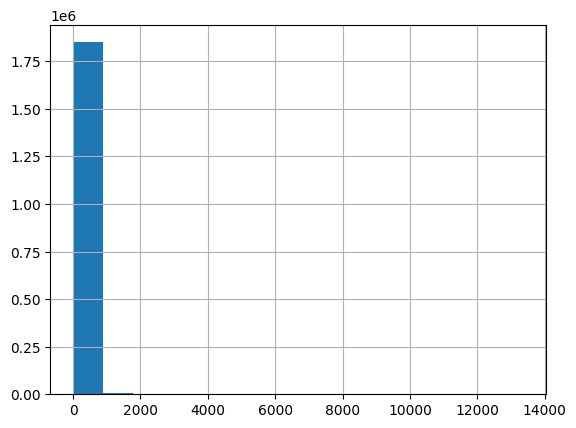

In [49]:
df3["total_bio"].hist(bins=15)


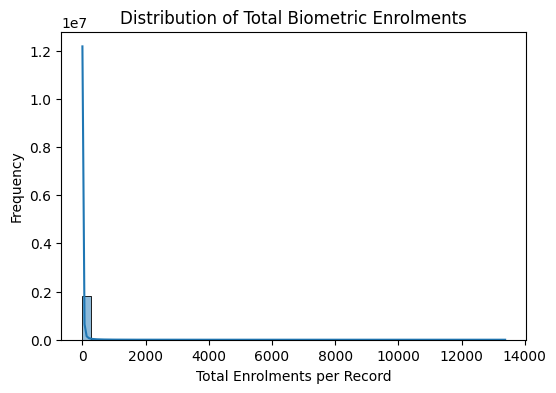

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(df3['total_bio'], bins=50, kde=True)
plt.title('Distribution of Total Biometric Enrolments')
plt.xlabel('Total Enrolments per Record')
plt.ylabel('Frequency')
plt.show()


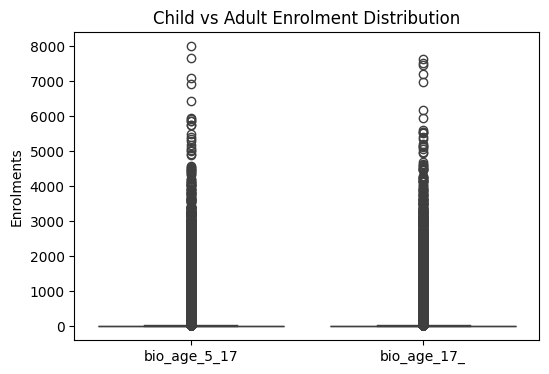

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df3[['bio_age_5_17','bio_age_17_']])
plt.title('Child vs Adult Enrolment Distribution')
plt.ylabel('Enrolments')
plt.show()


In [52]:


df3['year'] = df3['date'].dt.year
df3['month'] = df3['date'].dt.month
df3['weekday'] = df3['date'].dt.day_name()
df3['child_ratio'] = df3['bio_age_5_17'] / df3['total_bio']
df3['adult_ratio'] = df3['bio_age_17_'] / df3['total_bio']

In [53]:
df3["state"].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Orissa',
       'Puducherry', 'Pondicherry', 'Manipur', 'Sikkim', 'Tripura',
       'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'Andaman and Nicobar Islands', 'Andaman & Nicobar Islands',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'WESTBENGAL',
       'andhra pradesh', 'Westbengal', 'West  Bengal', 'WEST BENGAL',
       'West Bangal', 'ODISHA', 'odisha', 'West bengal', 'west Bengal',
       'Uttaranchal', 'Chhatisgarh', 'Tamilnadu'], dtype=object)

In [54]:
df3 = df3.dropna(subset=['state'])

In [55]:
STATE_CORRECTIONS = {
    'orissa': 'odisha',
    'uttaranchal': 'uttarakhand',
    'pondicherry': 'puducherry',

    'jammu & kashmir': 'jammu and kashmir',
    'andaman & nicobar islands': 'andaman and nicobar islands',

    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman & diu': 'dadra and nagar haveli and daman and diu',

    'westbengal': 'west bengal',
    'west bangal': 'west bengal',
    'west bengli': 'west bengal',

    'chhatisgarh': 'chhattisgarh'
}

In [56]:
OFFICIAL_STATES = {
    'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chhattisgarh',
    'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jharkhand',
    'karnataka', 'kerala', 'madhya pradesh', 'maharashtra',
    'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha',
    'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
    'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal',

    # Union Territories
    'andaman and nicobar islands', 'chandigarh', 'dadra and nagar haveli and daman and diu',
    'delhi', 'jammu and kashmir', 'ladakh', 'lakshadweep', 'puducherry'
}

In [57]:
df3['state_clean'] = (
    df3['state']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace('&', 'and')
    .str.replace(r'\s+', ' ', regex=True)
)

In [58]:
df3['is_numeric_state'] = df3['state_clean'].str.fullmatch(r'\d+')
df3['is_valid_state'] = df3['state_clean'].isin(OFFICIAL_STATES)

In [59]:
df3['state_clean'] = df3['state_clean'].replace(STATE_CORRECTIONS)

In [60]:
df3['state_final'] = np.where(
    df3['is_valid_state'] & ~df3['is_numeric_state'],
    df3['state_clean'],
    np.nan
)

In [61]:
df3.state.nunique()

57

In [62]:
df3 = df3.dropna(subset=['state_final'])

In [63]:
df3['state'] = df3['state_final']
df3 = df3.drop(columns=['state_clean', 'state_final', 'is_numeric_state', 'is_valid_state'])

In [64]:
df3['state'].nunique()

36

In [65]:
summary_stats = df3[['bio_age_5_17','bio_age_17_','total_bio']].describe()
summary_stats


,bio_age_5_17,bio_age_17_,total_bio
count,1.844456e+06,1.844456e+06,1.844456e+06
mean,1.853837e+01,1.921617e+01,3.775454e+01
std,8.404994e+01,8.839339e+01,1.629661e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.000000e+00
50%,4.000000e+00,4.000000e+00,8.000000e+00
75%,1.100000e+01,1.000000e+01,2.200000e+01
max,8.002000e+03,7.625000e+03,1.338100e+04


In [66]:
state_summary = (
    df3.groupby('state')
      .agg(
          avg_child=('bio_age_5_17','mean'),
          avg_adult=('bio_age_17_','mean'),
          avg_total=('total_bio','mean'),
          volatility=('total_bio','std')
      )
      .sort_values('avg_total', ascending=False)
)

state_summary.head(10)


,avg_child,avg_adult,avg_total,volatility
state,,,,
delhi,60.075278,80.799762,140.875041,642.356448
madhya pradesh,45.663770,38.864926,84.528696,337.785005
chhattisgarh,27.649194,55.144286,82.793480,268.016446
haryana,26.246434,35.634606,61.881040,252.907382
uttar pradesh,39.983413,21.712101,61.695514,228.365655
maharashtra,23.246982,37.811223,61.058205,208.866809
bihar,26.477146,32.248327,58.725473,212.856064
jharkhand,23.934826,31.390689,55.325515,227.201723
rajasthan,25.923775,24.186042,50.109816,153.395719


<Axes: xlabel='state'>

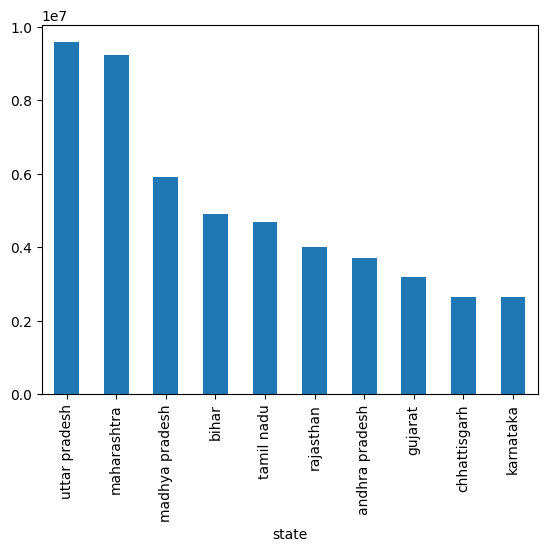

In [67]:
state_total = df3.groupby("state")["total_bio"].sum().sort_values(ascending=False).head(10)
state_total.plot(kind="bar")


<Axes: title={'center': 'total_bio'}, xlabel='state'>

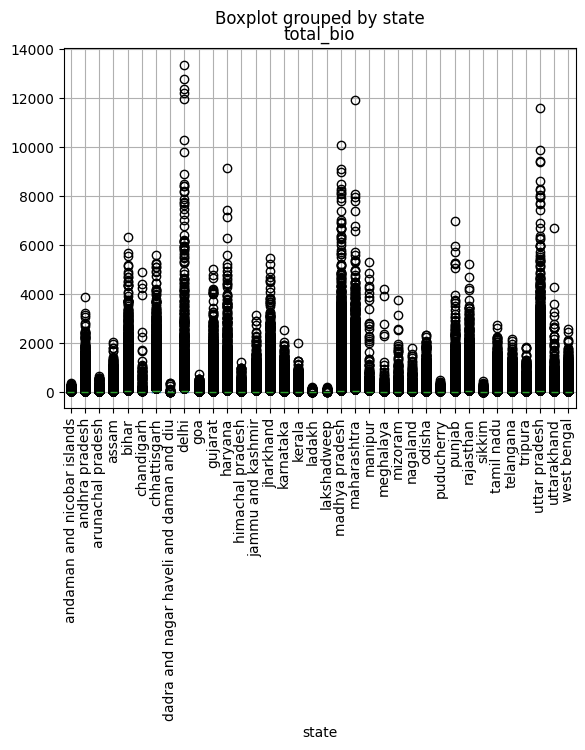

In [68]:
df3.boxplot(column="total_bio", by="state", rot=90)


In [69]:
state_summary['cv'] = state_summary['volatility'] / state_summary['avg_total']
state_summary.sort_values('cv', ascending=False).head(10)


,avg_child,avg_adult,avg_total,volatility,cv
state,,,,,
meghalaya,8.743657,12.229536,20.973193,124.255212,5.924478
chandigarh,29.692633,15.284420,44.977053,260.366413,5.788872
mizoram,25.539265,10.390564,35.929830,174.180119,4.847786
manipur,25.395118,17.715027,43.110145,200.534725,4.651683
delhi,60.075278,80.799762,140.875041,642.356448,4.559761
punjab,14.553858,21.607924,36.161782,158.467170,4.382173
dadra and nagar haveli and daman and diu,3.361607,7.941964,11.303571,48.310995,4.273959
gujarat,16.314517,19.388357,35.702874,149.707984,4.193163
jharkhand,23.934826,31.390689,55.325515,227.201723,4.106635


<Axes: xlabel='state'>

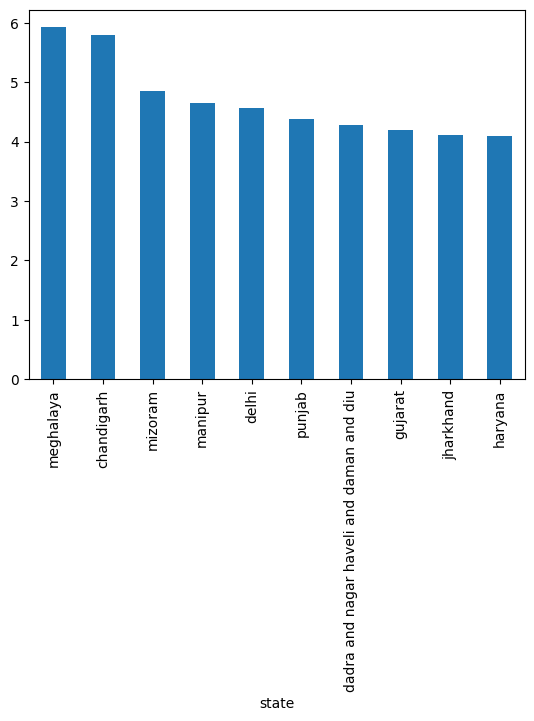

In [70]:
cv_df = df3.groupby("state")["total_bio"].agg(["mean","std"])
cv_df["cv"] = cv_df["std"] / cv_df["mean"]
cv_df.sort_values("cv", ascending=False).head(10)["cv"].plot(kind="bar")


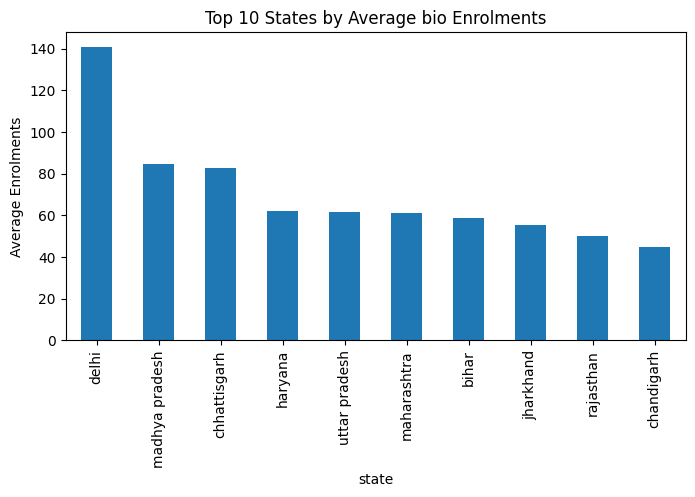

In [71]:
state_avg = (
    df3.groupby('state')['total_bio']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8,4))
state_avg.plot(kind='bar')
plt.title('Top 10 States by Average bio ' \
'Enrolments')
plt.ylabel('Average Enrolments')
plt.show()


Some states have moderate averages but very high peak enrolments.

This indicates unused or temporarily activated enrolment capacity.

Why it matters:
Average-based planning may underestimate actual system capability.

In [72]:
daily_ts = (
    df3.groupby('date')['total_bio']
      .sum()
      .sort_index()
)

daily_ts.describe()


count    8.900000e+01
mean     7.824337e+05
std      1.904433e+06
min      3.900000e+01
25%      2.752100e+05
50%      3.661460e+05
75%      4.296970e+05
max      9.778066e+06
Name: total_bio, dtype: float64

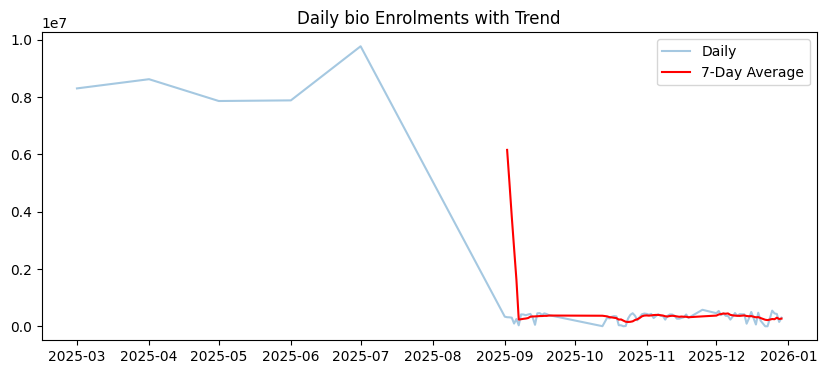

In [73]:

daily = df3.groupby('date')['total_bio'].sum()
rolling_7 = daily.rolling(window=7).mean()

plt.figure(figsize=(10,4))
plt.plot(daily, alpha=0.4, label='Daily')
plt.plot(rolling_7, color='red', label='7-Day Average')
plt.legend()
plt.title('Daily bio Enrolments with Trend')
plt.show()

March–July 2025 shows extremely high daily enrolments.

September 2025 onward shows much lower, stable daily enrolments.

This indicates the data does not represent a single continuous process.

<Axes: xlabel='state'>

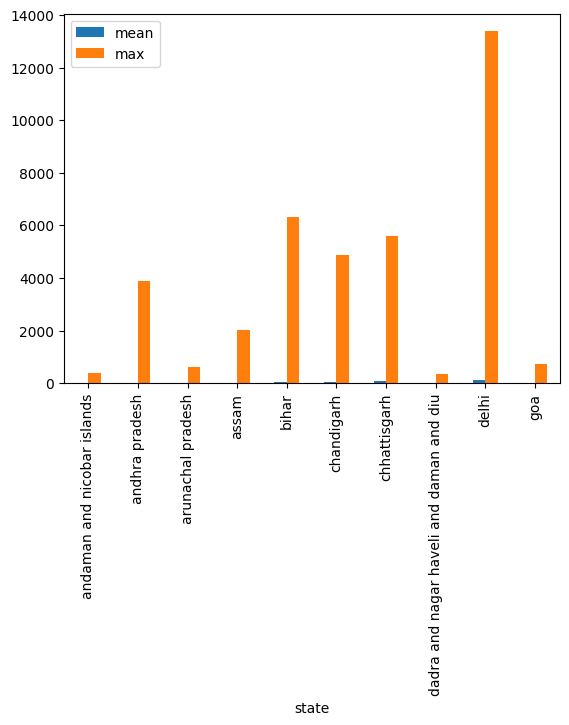

In [74]:
state_stats = df3.groupby("state")["total_bio"].agg(["mean","max"])
state_stats.head(10).plot(kind="bar")


In [75]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1844456 entries, 0 to 1861107
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
 6   total_bio     int64         
 7   year          int32         
 8   month         int32         
 9   weekday       object        
 10  child_ratio   float64       
 11  adult_ratio   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(3)
memory usage: 168.9+ MB


In [76]:
weekday_pattern = (
    df3.groupby('weekday')['total_bio']
      .mean()
      .reindex([
          'Monday','Tuesday','Wednesday',
          'Thursday','Friday','Saturday','Sunday'
      ])
)

weekday_pattern


weekday
Monday       15.552492
Tuesday      74.071984
Wednesday    15.330120
Thursday     43.714622
Friday       16.048931
Saturday     42.473948
Sunday       50.457784
Name: total_bio, dtype: float64

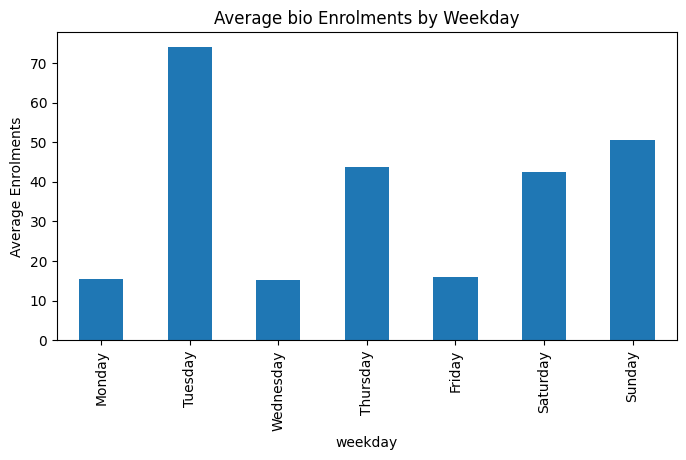

In [77]:
df3['weekday'] = df3['date'].dt.day_name()

weekday_avg = df3.groupby('weekday')['total_bio'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(8,4))
weekday_avg.plot(kind='bar')
plt.title('Average bio Enrolments by Weekday')
plt.ylabel('Average Enrolments')
plt.show()


In [78]:
Q1 = daily_ts.quantile(0.25)
Q3 = daily_ts.quantile(0.75)
IQR = Q3 - Q1

outlier_days = daily_ts[daily_ts > Q3 + 1.5 * IQR]
outlier_days.head(15)


date
2025-03-01    8307234
2025-04-01    8628423
2025-05-01    7866591
2025-06-01    7888857
2025-07-01    9778066
Name: total_bio, dtype: int64

In [79]:
correlation = df3[['bio_age_5_17','bio_age_17_']].corr()
correlation


,bio_age_5_17,bio_age_17_
bio_age_5_17,1.000000,0.786071
bio_age_17_,0.786071,1.000000


In [80]:
t_stat, p_value = stats.ttest_rel(
    df3['bio_age_17_'],
    df3['bio_age_5_17']
)

t_stat, p_value


(np.float64(16.278940737766153), np.float64(1.4060044495589167e-59))

In [81]:
data_quality = {
    'duplicate_rows': df3.duplicated().sum(),
    'negative_values': ((df3[['bio_age_5_17','bio_age_17_']] < 0).sum()).to_dict(),
    'zero_enrolments': (df3['total_bio'] == 0).sum()
}

data_quality


{'duplicate_rows': np.int64(94394),
 'negative_values': {'bio_age_5_17': 0, 'bio_age_17_': 0},
 'zero_enrolments': np.int64(12)}

In [82]:
forecast_df = daily_ts.asfreq('D').fillna(0)
forecast_df.head()


date
2025-03-01    8307234.0
2025-03-02          0.0
2025-03-03          0.0
2025-03-04          0.0
2025-03-05          0.0
Freq: D, Name: total_bio, dtype: float64